In [1]:
# start with our usual
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# note, need this for re-running, not for first time
plt.style.use("classic")

# just for fun (and to see the comparitive effects of smoothing):
import PIL.Image as Image
import PIL.ImageFilter as ImageFilter
import matplotlib.pyplot as plt
im = Image.open("/Users/jillnaiman1/Downloads/littleCorgiInHat.png", "r")

import ipywidgets

@ipywidgets.interact(radius=(1,100,5))
def make_plot(radius):
    myFilter = ImageFilter.GaussianBlur(radius=radius)
    smoothed_image = im.filter(myFilter)

    # plot originonal image
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(im)
    ax[1].imshow(smoothed_image)

# note how pixelated the last image becomes
#  the upshot is that when we give up detail we 
#  can then remap our data onto a larger grid
#  if we set radius == 100, we can almost 
#  represent our little corgi with a single
#  pixel at 1 color
# Something to consider going forward

interactive(children=(IntSlider(value=46, description='radius', min=1, step=5), Output()), _dom_classes=('widg…

# A quick intro to Affline transformations


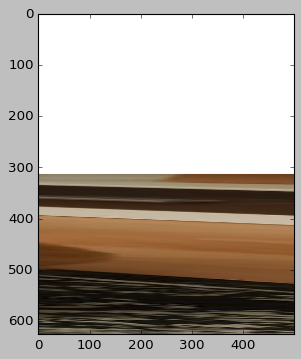

In [11]:
#import sys
#sys.path.append('PATH_TO_WHERE_affline_transforatmion.py is')

from affline_transformation import ScaleRotateTranslate

angle = 45 # degrees
newImage = ScaleRotateTranslate(im, angle)

# why not working?
#scale = (10,0.5)
#newImage = ScaleRotateTranslate(im, angle=45, scale=scale)

newImage = ScaleRotateTranslate(im, angle=0, center=im.size, new_center=im.size, scale=(10,0.5))

fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.imshow(newImage)

In [12]:
from sys import version
version

'3.7.1 (default, Nov 28 2018, 11:51:54) \n[Clang 10.0.0 (clang-1000.11.45.5)]'

# RGBs in a lot of detail


In [13]:
import matplotlib.cm as cm

In [14]:
# lets change some figure sizes
plt.rcParams['figure.figsize'] = (12,10)
plt.rcParams['figure.dpi'] = 200
plt.style.use("seaborn")

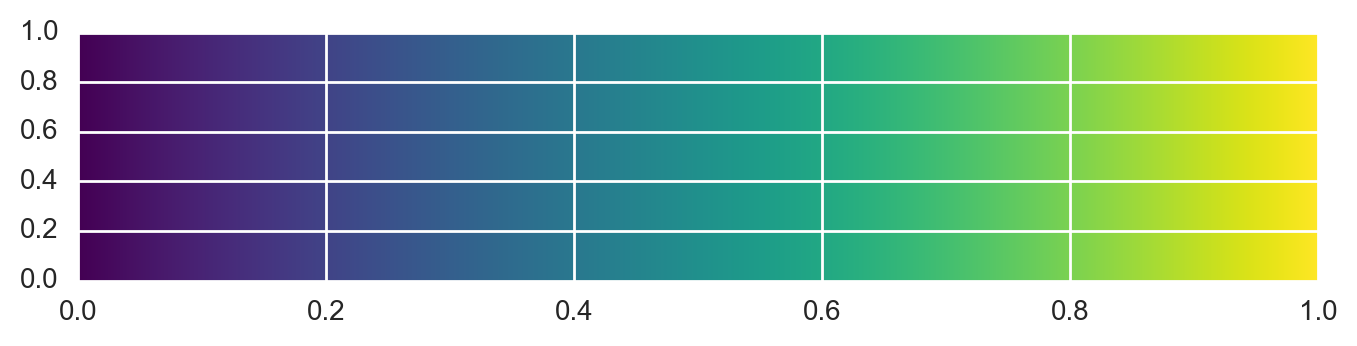

In [33]:
# lets look at the viridis map in detail (jet replacement)

np.mgrid[0:5:10j]
# the "10j" is the number of steps

viridis = cm.viridis(np.mgrid[0.0:1.0:256j])[:,:3]
viridis

# map onto a image
im = np.ones((viridis.shape[0],viridis.shape[0],4))
im # just a place holder
#viridis.shape

# map colormap onto placeholder
im[...,:3] *= viridis
#im[...,:3]
im

plt.imshow(im, extent=[0.0, 1.0, 0.0, 1.0], aspect=1.0/5)

In [34]:
# lets make an interactive widget
import ipywidgets

@ipywidgets.interact(cmap=cm.cmap_d)
def make_plot(cmap):
    mymap = cmap(np.mgrid[0.0:1.0:256j])[:,:3]
    im = np.ones((mymap.shape[0],mymap.shape[0],4))
    # map colormap onto placeholder
    im[...,:3] *= mymap
    plt.imshow(im, extent=[0.0, 1.0, 0.0, 1.0], aspect=1.0/5)

interactive(children=(Dropdown(description='cmap', options={'Blues': <matplotlib.colors.LinearSegmentedColorma…

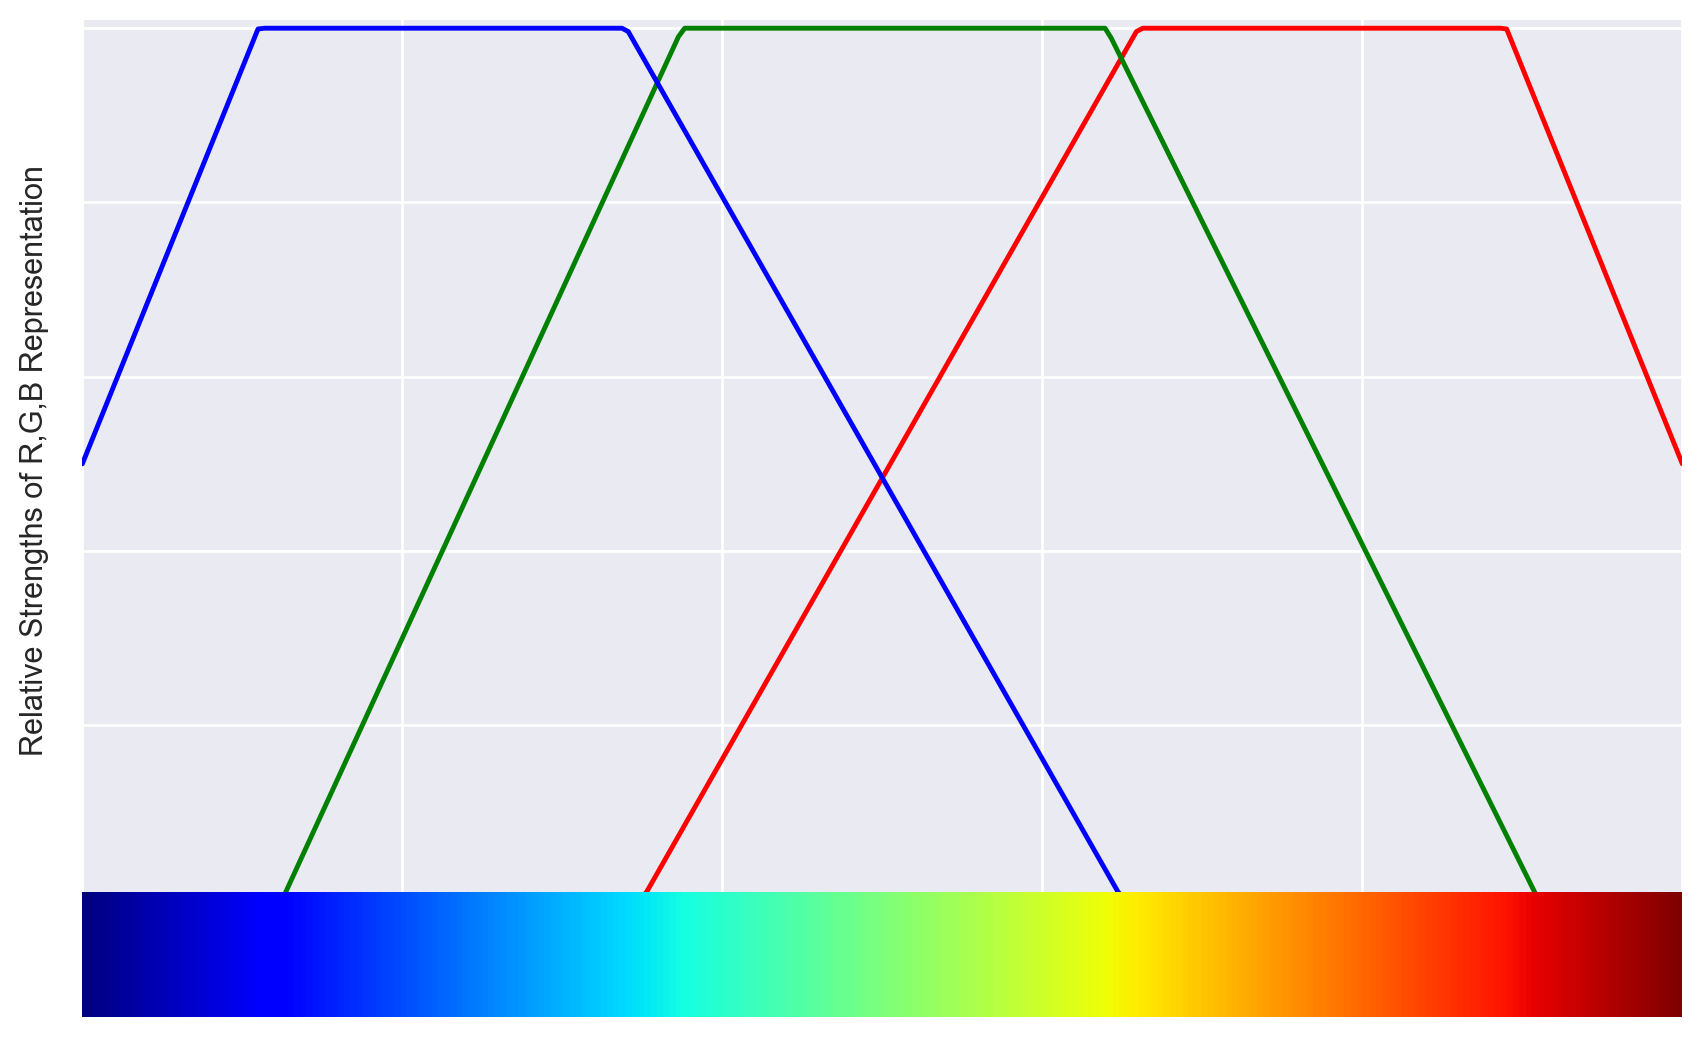

In [43]:
def plot_rgb(cmap_name):
    N = 256
    colors = cm.cmap_d[cmap_name](np.mgrid[0.0:1.0:N*1j])[:,:3]
    #put in axes by hand
    plt.clf
    fig = plt.figure()
    ax = fig.add_axes([0.0, 0.15, 1.0, 0.8])
    plt.plot(np.mgrid[0.0:1.0:N*1j], colors[:,0],'-r')
    plt.plot(np.mgrid[0.0:1.0:N*1j], colors[:,1],'-g')
    plt.plot(np.mgrid[0.0:1.0:N*1j], colors[:,2],'-b')
    plt.ylabel('Relative Strengths of R,G,B Representation')
    
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.01)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    
    # lets also plot the "spectrum" of our colormap
    ax = fig.add_axes([0.0, 0.0, 1.0, 0.2])
    im = np.ones((colors.shape[0],colors.shape[0], 4))
    im[...,:3] *= colors
    ax.imshow(im, interpolation='nearest', extent = [0.0, 1.0, 0.0, 1.0], aspect = 20./N)
    # take off annotations
    plt.xlim(0,1)
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_ticklabels([])
    ax.yaxis.set_visible(False)
    
    
cmap_name = 'jet'
plot_rgb(cmap_name)

In [44]:
# lets make a widget!

@ipywidgets.interact(cmap=cm.cmap_d)
def plot_rgb(cmap):
    N = 256
    #colors = cm.cmap_d[cmap_name](np.mgrid[0.0:1.0:N*1j])[:,:3]
    colors = cmap(np.mgrid[0.0:1.0:N*1j])[:,:3]
    #put in axes by hand
    plt.clf
    fig = plt.figure()
    ax = fig.add_axes([0.0, 0.15, 1.0, 0.8])
    plt.plot(np.mgrid[0.0:1.0:N*1j], colors[:,0],'-r')
    plt.plot(np.mgrid[0.0:1.0:N*1j], colors[:,1],'-g')
    plt.plot(np.mgrid[0.0:1.0:N*1j], colors[:,2],'-b')
    plt.ylabel('Relative Strengths of R,G,B Representation')
    
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.01)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    
    # lets also plot the "spectrum" of our colormap
    ax = fig.add_axes([0.0, 0.0, 1.0, 0.2])
    im = np.ones((colors.shape[0],colors.shape[0], 4))
    im[...,:3] *= colors
    ax.imshow(im, interpolation='nearest', extent = [0.0, 1.0, 0.0, 1.0], aspect = 20./N)
    # take off annotations
    plt.xlim(0,1)
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_ticklabels([])
    ax.yaxis.set_visible(False)
    

interactive(children=(Dropdown(description='cmap', options={'Blues': <matplotlib.colors.LinearSegmentedColorma…

# using Palettable


In [45]:
import palettable

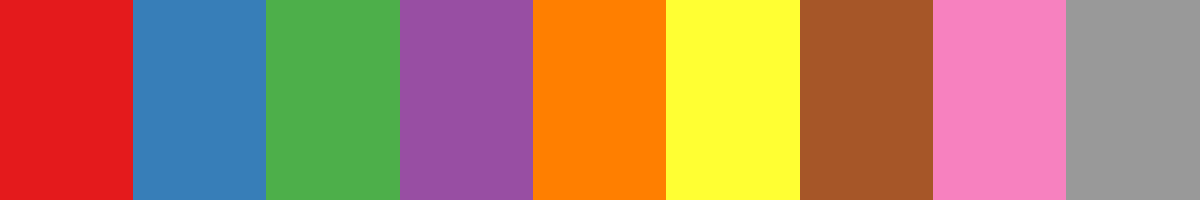

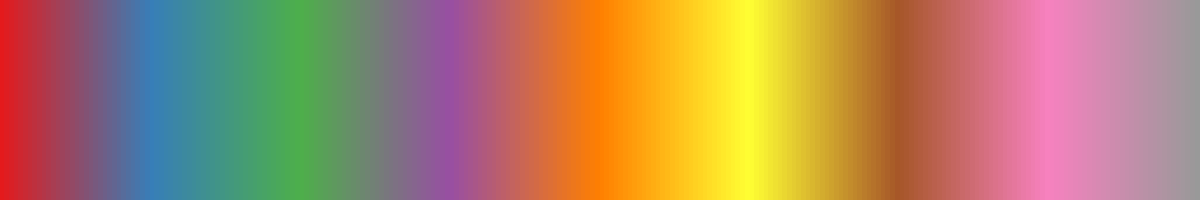

In [46]:
from palettable.colorbrewer.qualitative import Set1_9
Set1_9.show_discrete_image(size=(12,2))
Set1_9.show_continuous_image(size=(12,2))

In [47]:
from palette_colors import get_cb_diverging, get_cb_qualitative, get_cb_sequential, grab_names_palettable

In [50]:
# lets first play with a diverging map
names = grab_names_palettable('Diverging')
# another way to call ipywidgets
ipywidgets.interact(get_cb_diverging, name=names, number=(1,12))

interactive(children=(Dropdown(description='name', index=8, options=('BrBG', 'PiYG', 'PRGn', 'PuOr', 'RdBu', '…

<function palette_colors.get_cb_diverging(name='Spectral', number=9)>

In [51]:
names = grab_names_palettable('Sequential')
ipywidgets.interact(get_cb_sequential, name=names, number=(1,12))

interactive(children=(Dropdown(description='name', options=('Blues', 'BuGn', 'BuPu', 'GnBu', 'Greens', 'Greys'…

<function palette_colors.get_cb_sequential(name='Blues', number=9)>

In [53]:
names = grab_names_palettable('Qualitative')
ipywidgets.interact(get_cb_qualitative, name=names, number=(1,12))

interactive(children=(Dropdown(description='name', index=5, options=('Accent', 'Dark2', 'Paired', 'Pastel1', '…

<function palette_colors.get_cb_qualitative(name='Set1', number=9)>

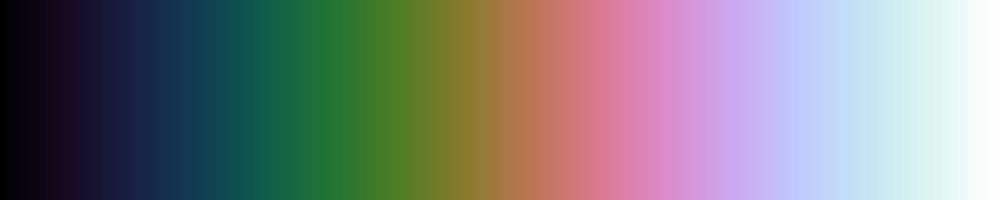

In [55]:
palettable.cubehelix.classic_16.show_continuous_image(size=(10,2))

Takeaways: you can use discrete sets of colors instead of RGB triplets to make colormaps

# Apply color maps to real data!!

In [56]:
import h5py

In [57]:
fn1 = "/Users/jillnaiman1/Downloads/michigan_lld.flt" # height & depth around L.M in ft
michigan = np.fromfile(fn1, dtype='f4').reshape([5365,4201])

In [58]:
michigan.shape

(5365, 4201)

(array([  285668.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0., 22252697.]),
 array([-9999.     , -8963.905  , -7928.8115 , -6893.717  , -5858.6226 ,
        -4823.5283 , -3788.4338 , -2753.3396 , -1718.2452 ,  -683.1509 ,
          351.94348], dtype=float32),
 <a list of 10 Patch objects>)

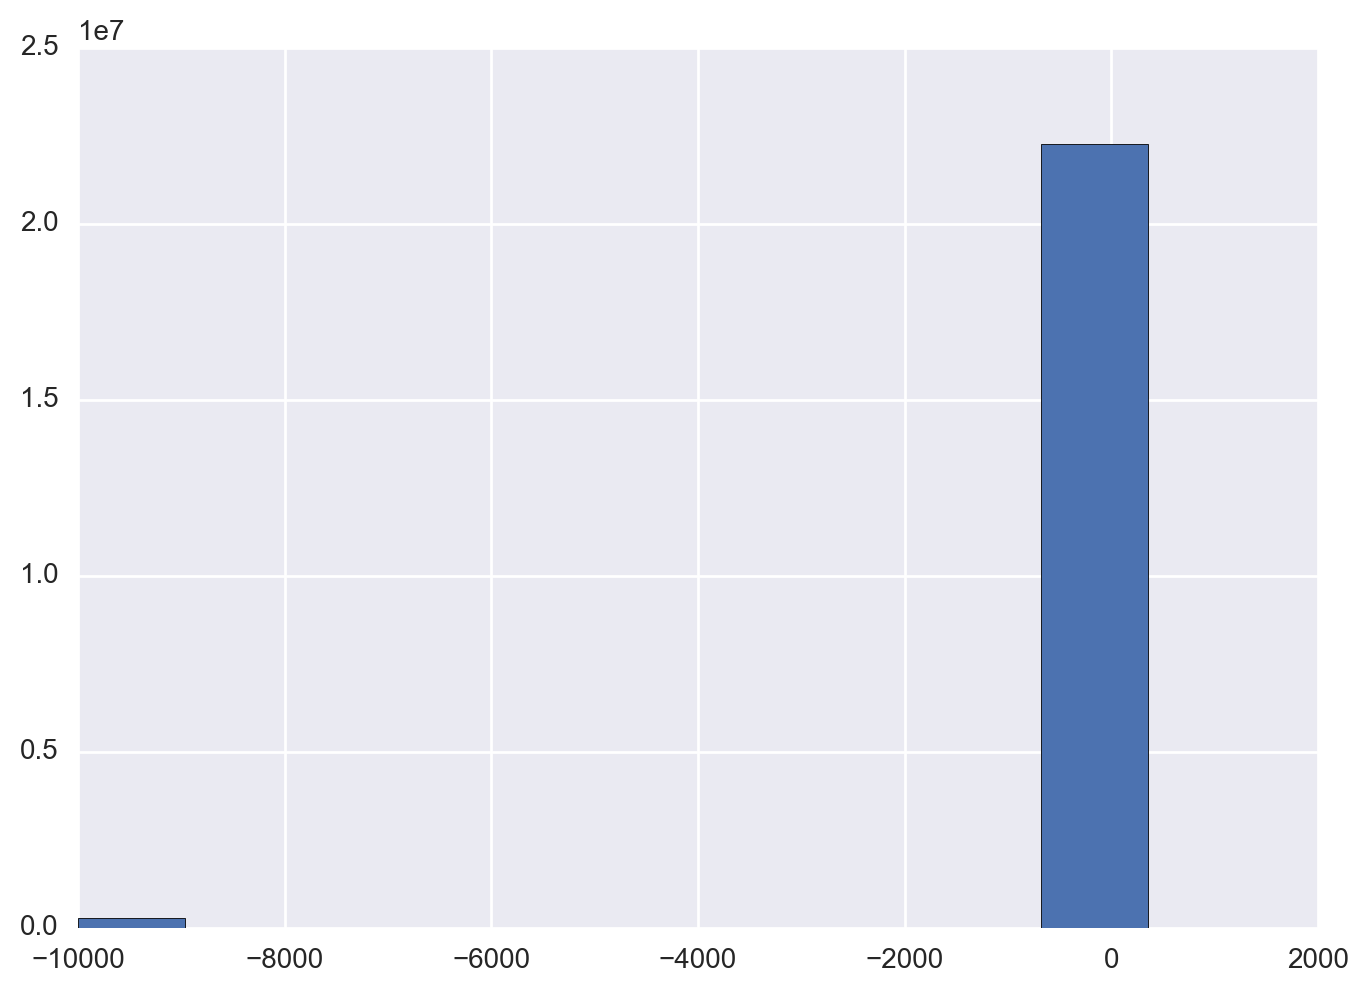

In [59]:
plt.hist(michigan.flat)

In [60]:
michigan.min()

-9999.0

In [62]:
michigan[michigan == -9999] = np.nan
np.nanmin(michigan), np.nanmax(michigan)

(-275.89, 351.94348)

In [63]:
np.min(michigan)

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


nan

(array([4.305380e+05, 9.692900e+05, 2.736477e+06, 3.288539e+06,
        4.979745e+06, 5.412426e+06, 2.916778e+06, 1.280268e+06,
        2.349550e+05, 3.681000e+03]),
 array([-275.89    , -213.10666 , -150.32332 ,  -87.53996 ,  -24.756617,
          38.026733,  100.81008 ,  163.59343 ,  226.37679 ,  289.16013 ,
         351.94348 ], dtype=float32),
 <a list of 10 Patch objects>)

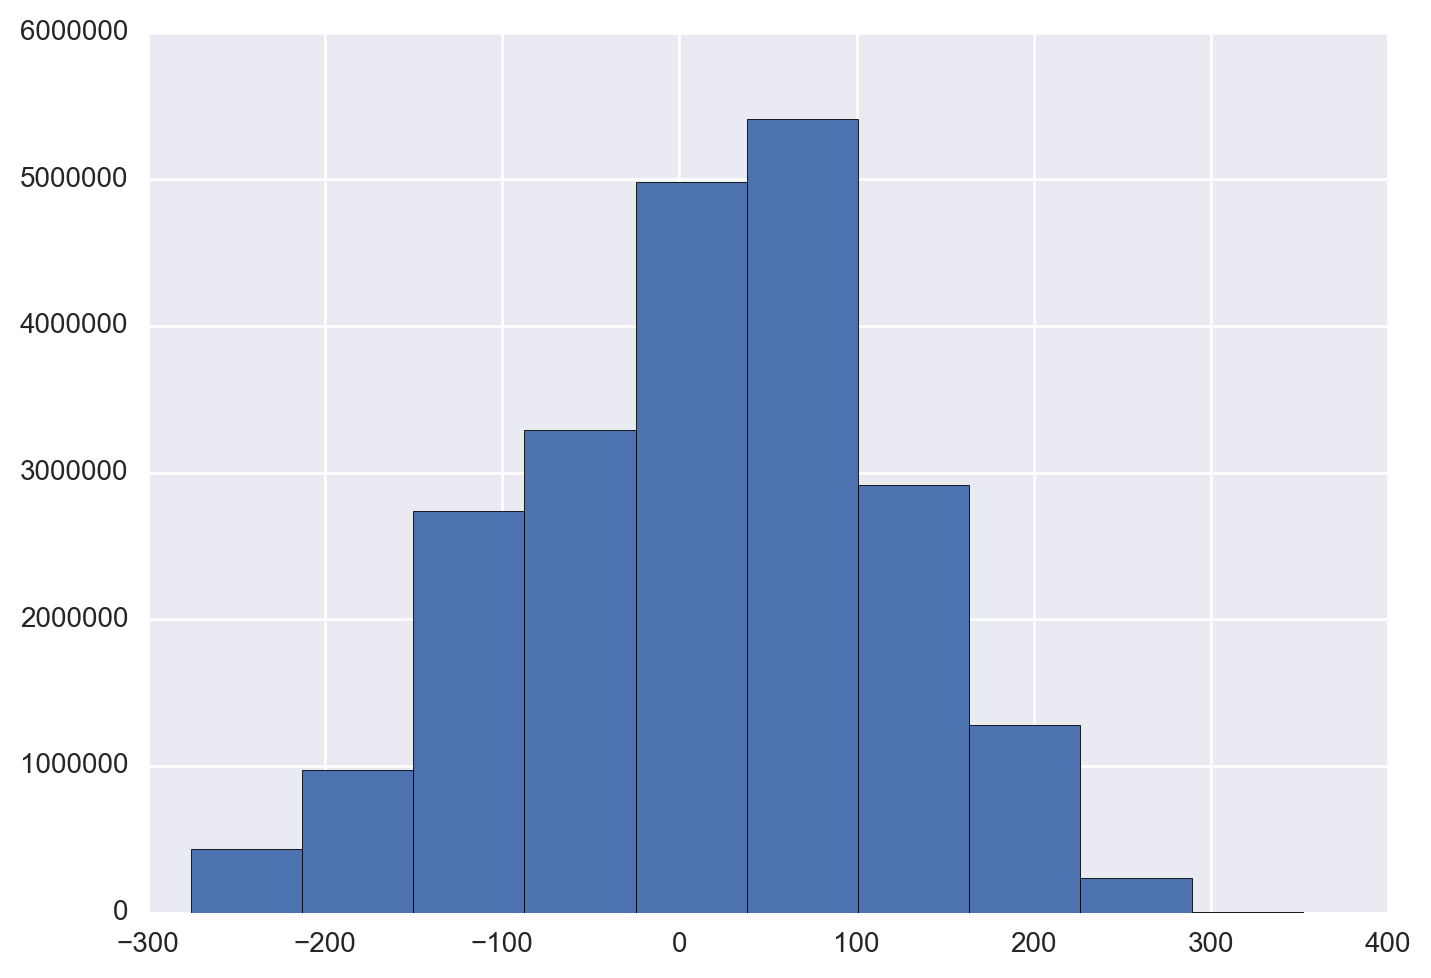

In [64]:
plt.hist(michigan[~np.isnan(michigan)])

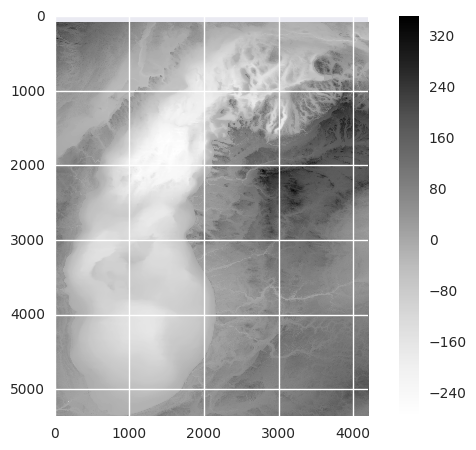

In [69]:
plt.imshow(michigan)
plt.colorbar()
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 100
plt.style.use('classic')

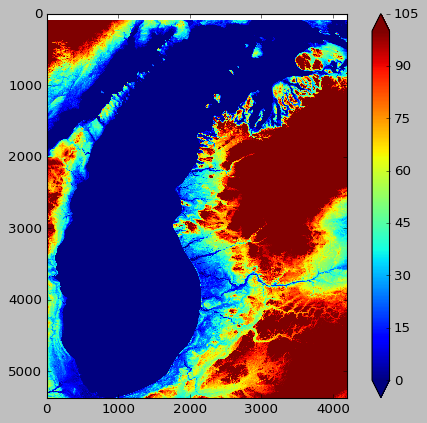

In [70]:
# lets play with this colormap's defaults
plt.imshow(michigan)
plt.clim(0,100)
plt.colorbar(extend='both')

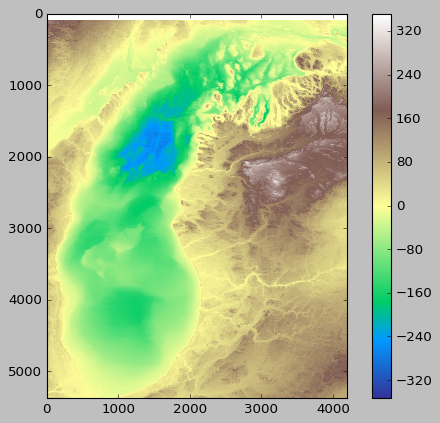

In [72]:
# (-275.89, 351.94)
plt.imshow(michigan, cmap="terrain")
plt.clim(-352, 352)
plt.colorbar()

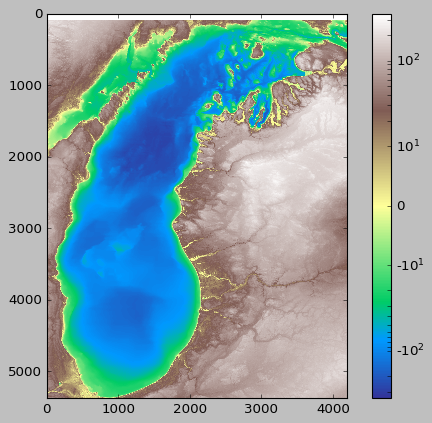

In [74]:
import matplotlib.colors as colors
plt.imshow(michigan, cmap="terrain", norm=colors.SymLogNorm(10))
plt.clim(-352,352)
plt.colorbar()

In [75]:
colors.SymLogNorm?

In [76]:
np.log10([1,10,50]), -1.0*np.log10(np.abs([-1,-10,-50]))

(array([0.     , 1.     , 1.69897]), array([-0.     , -1.     , -1.69897]))

(3300, 3900)

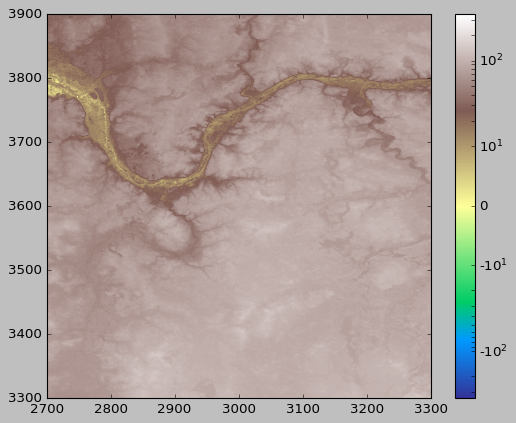

In [77]:
plt.imshow(michigan, cmap="terrain", norm=colors.SymLogNorm(10))
plt.clim(-352,352)
plt.colorbar()
plt.xlim(2700,3300)
plt.ylim(3300,3900)

In [79]:
@ipywidgets.interact(colormap=plt.colormaps(), 
                    color_range=(1.0, 352.0, 1.0),
                    sym_log=True)
def plot(colormap='terrain', color_range=352, sym_log=True):
    if sym_log:
        norm = colors.SymLogNorm(10)
    else:
        norm = colors.Normalize() # linear remaping -> doesn't do anything
    plt.imshow(michigan, cmap=colormap, norm=norm)
    plt.clim(-color_range, color_range)
    plt.colorbar(extend='both')

interactive(children=(Dropdown(description='colormap', index=154, options=('Accent', 'Accent_r', 'Blues', 'Blu…